In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data =pd.read_csv(r'C:\Users\29795\Desktop\msk_price_online.csv')
data.head()
data= data[(data['receipt_terminal_id'] ==data['from_terminal_id'])&(data['discharging_terminal_id']==data['destination_terminal_id'])]

data['etd'] = pd.to_datetime(data['etd'])
data=data[(data['etd']>='2020-08-26 00:00:00')] # 保证存在一个周期内

#valid_from,valid_to 去重
data['valid_from'] = pd.to_datetime(data['valid_from']).dt.floor('d')
data['valid_to'] = pd.to_datetime(data['valid_to']).dt.floor('d')
data_20gp =data[data['price_unit'] == '20GP']

data_20gp_col =data_20gp[['linecodeparentid','linecodename', 'pol_name','pod_name','valid_from','price','etd','vessel_name','voyage']]
data_20gp_col['gap'] =pd.DataFrame(pd.to_datetime(data_20gp_col['etd']) -pd.to_datetime(data_20gp_col['valid_from']))
data_20gp_col['gap'] =data_20gp_col['gap'].map(lambda x:x.days)
data_20gp_col= data_20gp_col.drop_duplicates()
data_20gp_col = data_20gp_col.dropna(axis=0,how='any')
data_20gp_col.sort_values(by=['pol_name','pod_name','vessel_name','etd','valid_from'],ascending=(False,False,False,False,True)).head()

data_20gp_col.info()

C:\Users\29795\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\29795\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48566 entries, 283852 to 1683561
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   linecodeparentid  48566 non-null  int64         
 1   linecodename      48566 non-null  object        
 2   pol_name          48566 non-null  object        
 3   pod_name          48566 non-null  object        
 4   valid_from        48566 non-null  datetime64[ns]
 5   price             48566 non-null  float64       
 6   etd               48566 non-null  datetime64[ns]
 7   vessel_name       48566 non-null  object        
 8   voyage            48566 non-null  object        
 9   gap               48566 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 4.1+ MB


C:\Users\29795\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [48]:
# grouped = df.groupby(['pol_name','pod_name','vessel_name','voyage'])
# grouped['price'].agg(max)

#data_20gp_col.sort('price', ascending=False).groupby(['pol_name','pod_name','vessel_name','voyage'], as_index=False).first()
#result = data_20gp_col[data_20gp_col.groupby(['pol_name','pod_name','vessel_name','voyage'])['price'].rank(method="first", ascending=False)==1]
vv_group =data_20gp_col.groupby(['pol_name','pod_name','vessel_name','voyage'])['price'].agg(['mean','max'])

#vv_group.to_csv('vv_group.csv',encoding ='gb18030')
vv =pd.read_csv('vv_group.csv',encoding ='gb18030')

#result.drop(['linecodeparentid','linecodename','valid_from','etd','gap'],axis =1,inplace=True)


df =pd.merge(data_20gp_col,vv,on=['pol_name','pod_name','vessel_name','voyage'])
df =df[df['mean'] !=df['max']]
def function(a, b):
    if a == b:
        return 1
    else:
        return 0
df['price_max'] = df.apply(lambda x : function(x['price'],x['max']),axis = 1)
df.groupby('price_max')['linecodeparentid'].agg('count')

C:\Users\29795\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,linecodeparentid,linecodename,pol_name,pod_name,valid_from,price_x,etd,vessel_name,voyage,gap,price_y
0,18842,加拿大,NINGBO,VANCOUVER,2020-07-24,2203.0,2020-08-29,CLEMENTINE MAERSK,034N,36,2203.0
1,18842,加拿大,NINGBO,VANCOUVER,2020-07-27,2203.0,2020-08-29,CLEMENTINE MAERSK,034N,33,2203.0
2,18842,加拿大,NINGBO,VANCOUVER,2020-07-25,2203.0,2020-08-29,CLEMENTINE MAERSK,034N,35,2203.0
3,18842,加拿大,NINGBO,VANCOUVER,2020-07-26,2203.0,2020-08-29,CLEMENTINE MAERSK,034N,34,2203.0
4,18842,加拿大,DALIAN,VANCOUVER,2020-07-24,2203.0,2020-08-29,MAERSK HOUSTON,035W,36,2903.0
5,18842,加拿大,DALIAN,VANCOUVER,2020-07-31,2403.0,2020-08-29,MAERSK HOUSTON,035W,29,2903.0
6,18842,加拿大,DALIAN,VANCOUVER,2020-08-01,2403.0,2020-08-29,MAERSK HOUSTON,035W,28,2903.0
7,18842,加拿大,DALIAN,VANCOUVER,2020-08-06,2403.0,2020-08-29,MAERSK HOUSTON,035W,23,2903.0
8,18842,加拿大,DALIAN,VANCOUVER,2020-08-21,2903.0,2020-08-29,MAERSK HOUSTON,035W,8,2903.0
9,18842,加拿大,DALIAN,VANCOUVER,2020-07-25,2203.0,2020-08-29,MAERSK HOUSTON,035W,35,2903.0


In [49]:
def function(a, b):
    if a == b:
        return 1
    else:
        return 0

df['price_max'] = df.apply(lambda x : function(x['price_x'],x['price_y']),axis = 1)

In [50]:
from sklearn.preprocessing import LabelEncoder
gle =LabelEncoder()
df['linecodeparentid'] =gle.fit_transform(df['linecodeparentid'])
df['linecodename'] =gle.fit_transform(df['linecodename'])
df['pol_name'] =gle.fit_transform(df['pol_name'])
df['pod_name'] =gle.fit_transform(df['pod_name'])
df['vessel_name'] =gle.fit_transform(df['vessel_name'])
df['valid_from']= pd.DataFrame(pd.to_datetime(df['valid_from']) -pd.to_datetime('2020-01-01'))
df['valid_from'] =df['valid_from'].map(lambda x:x.days)
df['etd'] =df['etd'].dt.month
df.head()

,linecodeparentid,linecodename,pol_name,pod_name,valid_from,price_x,etd,vessel_name,voyage,gap,price_y,price_max
0,0,4,4,93,205,2203.0,8,27,034N,36,2203.0,1
1,0,4,4,93,208,2203.0,8,27,034N,33,2203.0,1
2,0,4,4,93,206,2203.0,8,27,034N,35,2203.0,1
3,0,4,4,93,207,2203.0,8,27,034N,34,2203.0,1
4,0,4,0,93,205,2203.0,8,93,035W,36,2903.0,0


In [51]:
df_re =df.drop(['voyage','price_y'],axis =1)
df_re.head()

,linecodeparentid,linecodename,pol_name,pod_name,valid_from,price_x,etd,vessel_name,gap,price_max
0,0,4,4,93,205,2203.0,8,27,36,1
1,0,4,4,93,208,2203.0,8,27,33,1
2,0,4,4,93,206,2203.0,8,27,35,1
3,0,4,4,93,207,2203.0,8,27,34,1
4,0,4,0,93,205,2203.0,8,93,36,0


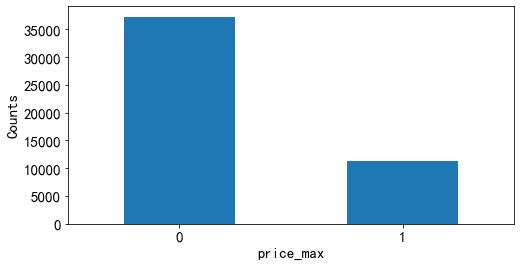

In [72]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = df_re['price_max'].value_counts().plot(kind = 'bar',
     figsize = (8,4),fontsize=15,rot = 0)
ax.set_ylabel('Counts',fontsize = 15)
ax.set_xlabel('price_max',fontsize = 15)
plt.show()

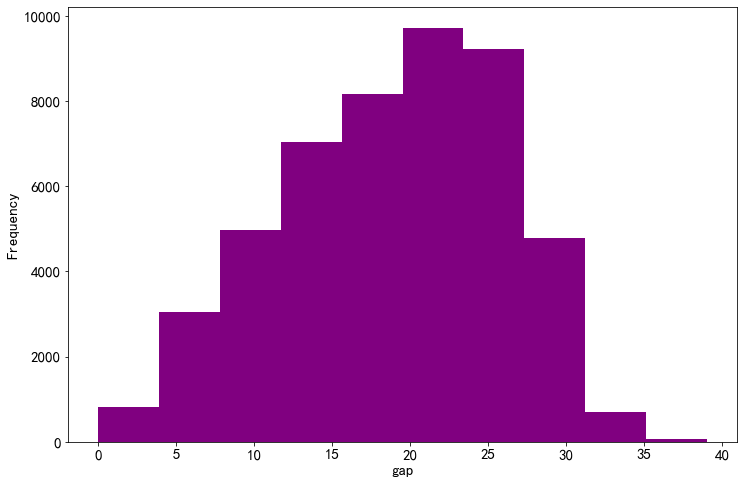

In [53]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = df_re['gap'].plot(kind = 'hist',bins = 10,color= 'purple',
                    figsize = (12,8),fontsize=15)

ax.set_ylabel('Frequency',fontsize = 15)
ax.set_xlabel('gap',fontsize = 15)
plt.show()

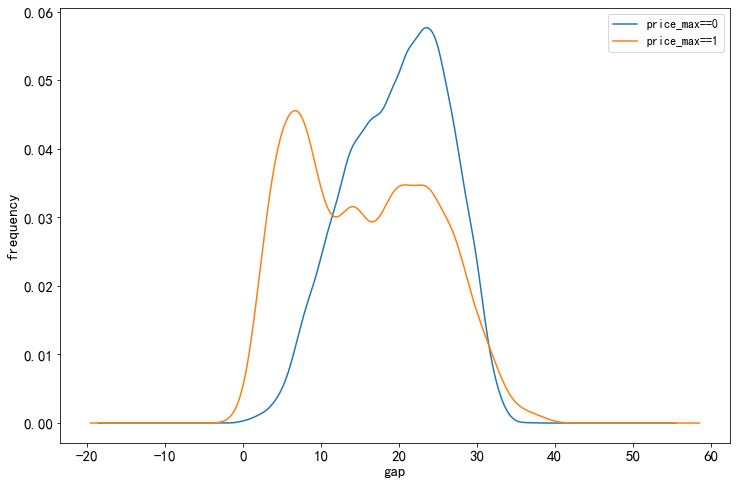

In [54]:
#gap和label的相关性
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = df_re.query('price_max == 0')['gap'].plot(kind = 'density',
                      figsize = (12,8),fontsize=15)
df.query('price_max == 1')['gap'].plot(kind = 'density',
                      figsize = (12,8),fontsize=15)
ax.legend(['price_max==0','price_max==1'],fontsize = 12)
ax.set_ylabel('frequency',fontsize = 15)
ax.set_xlabel('gap',fontsize = 15)
plt.show()

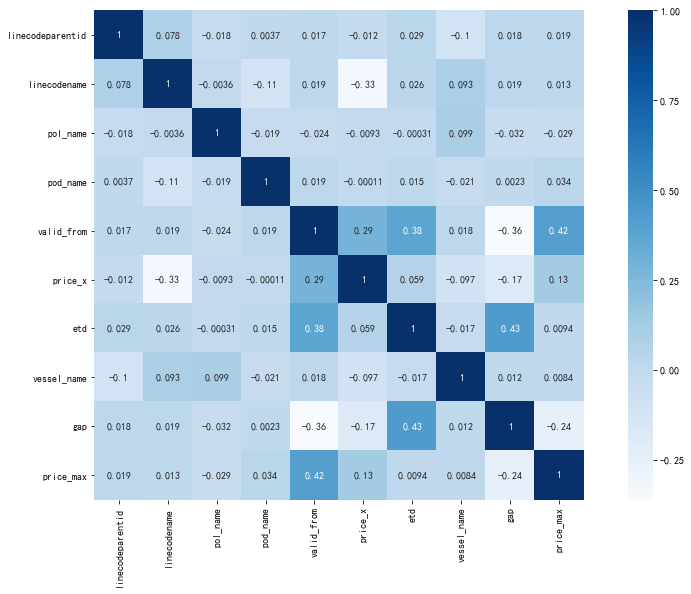

In [55]:
import seaborn as sns
def test(df):
    dfData = df.corr()
    plt.subplots(figsize=(16, 9)) # 设置画面大小
    sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
    #plt.savefig('./BluesStateRelation.png')
    plt.show()
#sns.pairplot(df) 
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
test(df_re)

In [56]:
from sklearn.datasets import load_iris



from sklearn import tree, svm, naive_bayes,neighbors
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
x =df_re.drop('price_max',axis =1)
y =df_re['price_max']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

clfs = {'svm': svm.SVC(),\
        'decision_tree':tree.DecisionTreeClassifier(),
        'naive_gaussian': naive_bayes.GaussianNB(), \
        'naive_mul':naive_bayes.MultinomialNB(),\
        'K_neighbor' : neighbors.KNeighborsClassifier(),\
        'bagging_knn' : BaggingClassifier(neighbors.KNeighborsClassifier(), max_samples=0.5,max_features=0.5), \
        'bagging_tree': BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5,max_features=0.5),
        'random_forest' : RandomForestClassifier(n_estimators=50),\
        'adaboost':AdaBoostClassifier(n_estimators=50),\
        'gradient_boost' : GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,max_depth=1, random_state=0)
        }

def try_different_method(clf):
    clf.fit(x_train,y_train.ravel())
    score = clf.score(x_test,y_test.ravel())
    print('the score is :', score)

for clf_key in clfs.keys():
    print('the classifier is :',clf_key)
    clf = clfs[clf_key]
    try_different_method(clf)

the classifier is : svm
the score is : 0.8897467572575664
the classifier is : decision_tree
the score is : 0.9220712373893349
the classifier is : naive_gaussian
the score is : 0.8069796170475603
the classifier is : naive_mul
the score is : 0.606959028206712
the classifier is : K_neighbor
the score is : 0.8932468602017707
the classifier is : bagging_knn
the score is : 0.881408276714021
the classifier is : bagging_tree
the score is : 0.924130121474161
the classifier is : random_forest
the score is : 0.9355569281449454
the classifier is : adaboost
the score is : 0.8532015647519045
the classifier is : gradient_boost
the score is : 0.8607164916615194


In [57]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

knc = KNN(n_neighbors =6,)
knc.fit(x_train,y_train)
y_predict = knc.predict(x_test)

print('KNN 准确率: %f,准确率: %f,召回率: %f,F1: %f'
      %(knc.score(x_test,y_test),precision_score(y_test, y_predict,  average='macro'),recall_score(y_test, y_predict,  average='macro'),f1_score(y_test, y_predict,  average='macro')))

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predict = rfc.predict(x_test)
print('随机森林 准确率: %f,准确率: %f,召回率: %f,F1: %f'
      %(rfc.score(x_test,y_test),precision_score(y_test, y_predict,  average='macro'),recall_score(y_test, y_predict,  average='macro'),f1_score(y_test, y_predict,  average='macro')))

KNN 准确率: 0.886761,准确率: 0.873302,召回率: 0.796094,F1: 0.825225
随机森林 准确率: 0.929483,准确率: 0.913660,召回率: 0.885469,F1: 0.898433


In [58]:
import numpy as np
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))  

0.9294832200947086


In [59]:
# 分类报告：precision/recall/fi-score/均值/分类个数
from sklearn.metrics import classification_report
target_names = ['1', '0']
print(classification_report(y_test, y_predict, target_names=target_names))

             precision    recall  f1-score   support

          1       0.94      0.97      0.95      7435
          0       0.89      0.80      0.84      2279

avg / total       0.93      0.93      0.93      9714



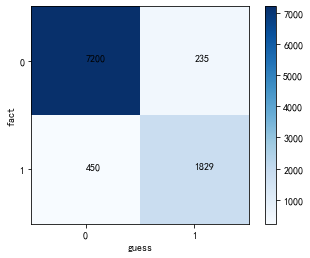

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
 
guess = y_predict
fact = y_test
classes = list(set(fact))
classes.sort()
confusion = confusion_matrix(guess, fact)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()
plt.xlabel('guess')
plt.ylabel('fact')
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
plt.show()

In [62]:
x

,linecodeparentid,linecodename,pol_name,pod_name,valid_from,price_x,etd,vessel_name,gap
0,0,4,4,93,205,2203.0,8,27,36
1,0,4,4,93,208,2203.0,8,27,33
2,0,4,4,93,206,2203.0,8,27,35
3,0,4,4,93,207,2203.0,8,27,34
4,0,4,0,93,205,2203.0,8,93,36
...,...,...,...,...,...,...,...,...,...
48561,5,18,3,91,245,1720.0,10,67,32
48562,1,15,3,52,245,908.0,9,45,25
48563,1,15,6,54,245,1123.0,9,45,21
48564,0,4,4,93,245,2754.0,10,249,31


Train on 38852 samples, validate on 9714 samples
Epoch 1/50
 - 1s - loss: 0.2441 - val_loss: 0.2361
Epoch 2/50
 - 1s - loss: 0.2328 - val_loss: 0.2360
Epoch 3/50
 - 1s - loss: 0.2328 - val_loss: 0.2353
Epoch 4/50
 - 1s - loss: 0.2331 - val_loss: 0.2352
Epoch 5/50
 - 1s - loss: 0.2328 - val_loss: 0.2347
Epoch 6/50
 - 1s - loss: 0.2329 - val_loss: 0.2347
Epoch 7/50
 - 1s - loss: 0.2328 - val_loss: 0.2365
Epoch 8/50
 - 1s - loss: 0.2329 - val_loss: 0.2353
Epoch 9/50
 - 1s - loss: 0.2331 - val_loss: 0.2359
Epoch 10/50
 - 1s - loss: 0.2329 - val_loss: 0.2353
Epoch 11/50
 - 1s - loss: 0.2328 - val_loss: 0.2349
Epoch 12/50
 - 1s - loss: 0.2327 - val_loss: 0.2354
Epoch 13/50
 - 1s - loss: 0.2327 - val_loss: 0.2350
Epoch 14/50
 - 1s - loss: 0.2328 - val_loss: 0.2351
Epoch 15/50
 - 1s - loss: 0.2328 - val_loss: 0.2359
Epoch 16/50
 - 1s - loss: 0.2329 - val_loss: 0.2374
Epoch 17/50
 - 1s - loss: 0.2328 - val_loss: 0.2363
Epoch 18/50
 - 1s - loss: 0.2327 - val_loss: 0.2360
Epoch 19/50
 - 1s - loss

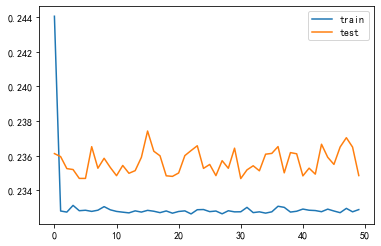

ValueError: Layer concatenate_2 was called with an input that isn't a symbolic tensor. Received type: <class 'tuple'>. Full input: [(array([[0.00047052],
       [0.00047052],
       [0.00047052],
       ...,
       [0.00047052],
       [0.00047052],
       [0.00047052]], dtype=float32), array([[ 15.,  10.,   6., ...,   9., 183.,  19.],
       [  8.,   4.,  42., ...,   8., 150.,  14.],
       [  1.,   2.,  28., ...,   8.,  17.,  16.],
       ...,
       [  8.,   0.,  83., ...,   9., 216.,  24.],
       [ 11.,   5.,  78., ...,   9., 173.,  29.],
       [ 15.,   2.,  81., ...,   9.,  71.,  23.]]))]. All inputs to the layer should be tensors.

In [63]:
# design network

#回归 
from keras.layers import concatenate
x =df_re.drop(['price_x'],axis =1)
y =df_re['price_x']
x =x.values
y=y.values

model =models.Sequential()

model.add(layers.LSTM(50,input_shape =(x_train.shape[1],x_train.shape[2])))
model.add(layers.Dense(1))


model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(x_train, y_train, epochs=50, batch_size=72, validation_data=(x_test, y_test), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(x_test)
x_test= x_test.reshape((x_test.shape[0], x_test.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, x_test[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
y_test = test_y.reshape((len(y_test), 1))
inv_y = concatenate((y_test, x_test[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

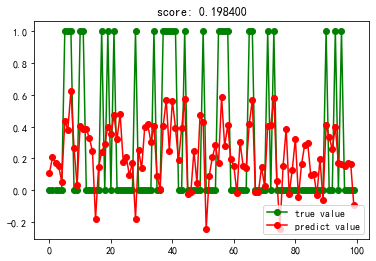

In [68]:
x =df_re.drop(['price_x'],axis =1)
y =df_re['price_x']
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state =1)
def try_different_method(clf):
    clf.fit(x_train,y_train)
    score = clf.score(x_test, y_test)
    result = clf.predict(x_test)
    plt.figure()
    plt.plot( y_test[:100],'go-',label='true value')
    plt.plot(result[:100],'ro-',label='predict value')
    #plt.title('score: %f'%score)
    plt.legend()
    plt.show()
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
try_different_method(linear_reg)

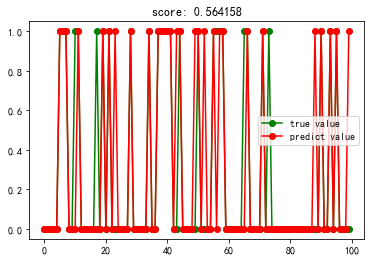

In [69]:
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor()
try_different_method(tree_reg)

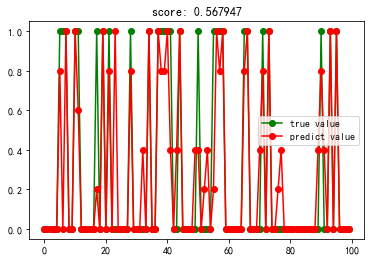

In [73]:
knn = neighbors.KNeighborsRegressor()
try_different_method(knn)

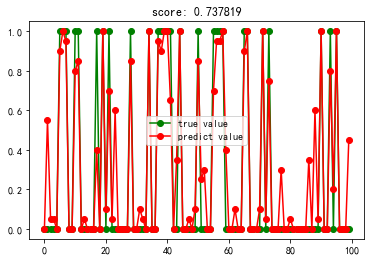

In [74]:
rf =ensemble.RandomForestRegressor(n_estimators=20)#这里使用20个决策树
try_different_method(rf)

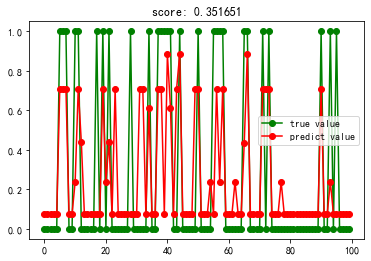

In [75]:
ada = ensemble.AdaBoostRegressor(n_estimators=50)
try_different_method(ada)